In [4]:
import pandas as pd
import sys
sys.path.append('./working_files')
from working_files.functions import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [5]:
from openbb import obb
obb.user.preferences.output_type = 'dataframe'

Extensions to add: federal_reserve@1.4.3, yfinance@1.4.6
Extensions to remove: federal_reserve@1.4.2, yfinance@1.4.3

Building...


In [38]:
stocks = [
    "AAPL",  # Apple Inc.
    "MSFT",  # Microsoft Corporation
    "GOOGL", # Alphabet Inc. (Class A)
    "AMZN",  # Amazon.com Inc.
    "META",  # Meta Platforms Inc.
    "NVDA",  # NVIDIA Corporation
    "TSLA",  # Tesla Inc.
    "JPM",   # JPMorgan Chase & Co.
    "V",     # Visa Inc.
    "AMD",
    "KO", 
    "SBUX",
    "PEP",
    "QQQ", 
    "SPY",
    "GE",
    "GM",
    "NFLX",
    "RBLX",
    "SONY",
    "WMT",
    "IBM",
    "TGT"
]


for i in range(len(stocks)):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


<Axes: xlabel='date'>

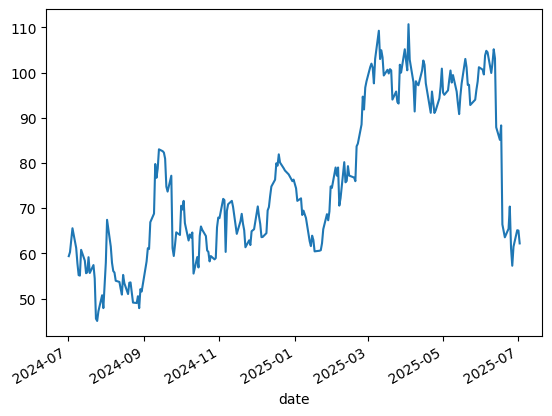

In [26]:
def data_collecter(list_stocks):
    stock_data = {}
    for stock in stocks:
        df = adding_relevant_columns(stock_insights(obb.equity.price.historical(stock, provider = 'yfinance')))
        stock_data[stock] = df
    return stock_data

# data = stock_insights(obb.equity.price.historical('AAPL', provider = 'yfinance'))
# data.index = pd.to_datetime(stock_insights(obb.equity.price.historical('AAPL', provider = 'yfinance')).index)

# data.index

closing_v = data_collecter(stocks)['V']['close']

closing_jpm  = data_collecter(stocks)['JPM']['close']

data = pd.concat([closing_v, closing_jpm], axis = 1)
data.columns = ['V', 'JPM']

# data.plot()


spread = closing_v - closing_jpm

spread.plot()

In [27]:
data = data_collecter(stocks)

apple = data['AAPL']
nvidia = data['NVDA']
google = data['GOOGL']
amd = data['AMD']
qqq = data['QQQ']

def combining_stock_data(stocks_of_interest, timeperiod = '2024-01-01'):
    dataframe = pd.DataFrame()
    names = list()
    for name in stocks_of_interest:
        dataframe = pd.concat([dataframe,stock_insights(obb.equity.price.historical(name, provider = 'yfinance'))['close']],
                    axis = 1)
        names.append(name)
        dataframe.columns = names
    dataframe.index = pd.to_datetime(dataframe.index)
    dataframe = dataframe[dataframe.index > pd.to_datetime(timeperiod)]
    correlation = dataframe.corr()
    return dataframe, correlation

combining_stock_data(stocks)

closing_views, correlation_across = combining_stock_data(stocks)

# def finding_highly_correlated_items(matri = correlation_across):
    

AAPL      MSFT     GOOGL      AMZN      META      NVDA      TSLA  \
AAPL   1.000000 -0.041618  0.575796  0.420234  0.068889  0.284516  0.382307   
MSFT  -0.041618  1.000000  0.396713  0.404305  0.388598  0.668052  0.364915   
GOOGL  0.575796  0.396713  1.000000  0.804982  0.425333  0.536325  0.739662   
AMZN   0.420234  0.404305  0.804982  1.000000  0.784627  0.625877  0.891663   
META   0.068889  0.388598  0.425333  0.784627  1.000000  0.573649  0.618455   
NVDA   0.284516  0.668052  0.536325  0.625877  0.573649  1.000000  0.558824   
TSLA   0.382307  0.364915  0.739662  0.891663  0.618455  0.558824  1.000000   
JPM   -0.086980  0.332938  0.357934  0.739283  0.877078  0.496916  0.661346   
V     -0.252416  0.105671  0.117212  0.566528  0.776339  0.215424  0.516540   
AMD    0.319457  0.408106  0.111553 -0.205953 -0.325104  0.320934 -0.273126   
KO    -0.569378 -0.173133 -0.755629 -0.526566 -0.005446 -0.419088 -0.563829   
SBUX   0.478462 -0.189539  0.222482  0.493313  0.584680  0.302413  0.302182   
PEP    0.452233 -0.252237 -0.133426 -0.467502 -0.644923 -0.201981 -0.497229   
QQQ    0.338944  0.673688  0.697495  0.882437  0.828151  0.849293  0.780523   
SPY    0.423369  0.557280  0.630466  0.861041  0.814248  0.839944  0.749689   
GE    -0.478100  0.414233 -0.050486  0.347490  0.756714  0.338988  0.231569   
GM     0.429184  0.268312  0.455853  0.554513  0.278744  0.688848  0.577767   
NFLX  -0.379900  0.338806  0.094751  0.518624  0.767132  0.332754  0.506175   
RBLX  -0.397272  0.488756  0.183030  0.550330  0.781962  0.403528  0.518206   
SONY  -0.371557  0.108885 -0.022826  0.384356  0.661545  0.079453  0.349343   
WMT   -0.038954  0.142860  0.255628  0.694062  0.816371  0.340126  0.688057   
IBM   -0.288503  0.204064 -0.002264  0.476669  0.834155  0.294406  0.379517   
TGT    0.630349 -0.010516  0.251327 -0.111806 -0.398143  0.105463 -0.175668   

            JPM         V       AMD  ...       QQQ       SPY        GE  \
AAPL  -0.086980 -0.252416  0.319457  ...  0.338944  0.423369 -0.478100   
MSFT   0.332938  0.105671  0.408106  ...  0.673688  0.557280  0.414233   
GOOGL  0.357934  0.117212  0.111553  ...  0.697495  0.630466 -0.050486   
AMZN   0.739283  0.566528 -0.205953  ...  0.882437  0.861041  0.347490   
META   0.877078  0.776339 -0.325104  ...  0.828151  0.814248  0.756714   
NVDA   0.496916  0.215424  0.320934  ...  0.849293  0.839944  0.338988   
TSLA   0.661346  0.516540 -0.273126  ...  0.780523  0.749689  0.231569   
JPM    1.000000  0.886379 -0.525628  ...  0.753152  0.729799  0.777657   
V      0.886379  1.000000 -0.751007  ...  0.520022  0.491621  0.797125   
AMD   -0.525628 -0.751007  1.000000  ...  0.036165  0.050792 -0.376230   
KO    -0.005697  0.228360 -0.249606  ... -0.357761 -0.345476  0.455089   
SBUX   0.425167  0.345106 -0.137807  ...  0.429502  0.591399  0.180444   
PEP   -0.798547 -0.878617  0.688650  ... -0.448008 -0.328112 -0.766118   
QQQ    0.753152  0.520022  0.036165  ...  1.000000  0.964068  0.520606   
SPY    0.729799  0.491621  0.050792  ...  0.964068  1.000000  0.473747   
GE     0.777657  0.797125 -0.376230  ...  0.520606  0.473747  1.000000   
GM     0.352724  0.170799  0.140293  ...  0.580725  0.669038  0.010688   
NFLX   0.890567  0.928788 -0.618472  ...  0.574159  0.502333  0.872247   
RBLX   0.872310  0.847132 -0.493764  ...  0.626732  0.538987  0.880350   
SONY   0.773274  0.926195 -0.722803  ...  0.385888  0.318661  0.811892   
WMT    0.892787  0.907356 -0.654118  ...  0.634151  0.634590  0.670573   
IBM    0.834801  0.889932 -0.555156  ...  0.536830  0.530287  0.886497   
TGT   -0.582274 -0.789815  0.774130  ... -0.092922 -0.000147 -0.683141   

             GM      NFLX      RBLX      SONY       WMT       IBM       TGT  
AAPL   0.429184 -0.379900 -0.397272 -0.371557 -0.038954 -0.288503  0.630349  
MSFT   0.268312  0.338806  0.488756  0.108885  0.142860  0.204064 -0.010516  
GOOGL  0.455853  0.094751  0.183030 -0.022826  0.255628 -0.002264  0.251327  
AMZN   0.554513  0.518624

In [66]:
# counting the number of columns in matrix
def identifying_pairs_stocks_highly_correlated(matrix = correlation_across):
    threshhold = 0.90
    highly_correlated_stocks = {}
    for column in range(len(matrix.columns)):
        for row in range(column + 1, len(matrix)):
            # column value
            col1 = matrix.columns[column]
            # row value
            col2 = matrix.columns[row]
            true_correlation_value = matrix.loc[col1,col2]
            if true_correlation_value > threshhold:
                highly_correlated_stocks[col1,col2] = true_correlation_value
    return highly_correlated_stocks


test = identifying_pairs_stocks_highly_correlated()
test

{('V', 'NFLX'): 0.9287883282130013,
 ('V', 'SONY'): 0.9261951988707584,
 ('V', 'WMT'): 0.907355960899953,
 ('QQQ', 'SPY'): 0.9640679244579687,
 ('NFLX', 'RBLX'): 0.9478234468697534,
 ('NFLX', 'SONY'): 0.9141120775705411}

In [74]:
for key in test.keys():
    for index in range(len(key)):
        print(key[index])
        

V
NFLX
V
SONY
V
WMT
QQQ
SPY
NFLX
RBLX
NFLX
SONY


In [ ]:
def calculating_spread(top_stocks):
    while top_stocks:
        
    

<Axes: >

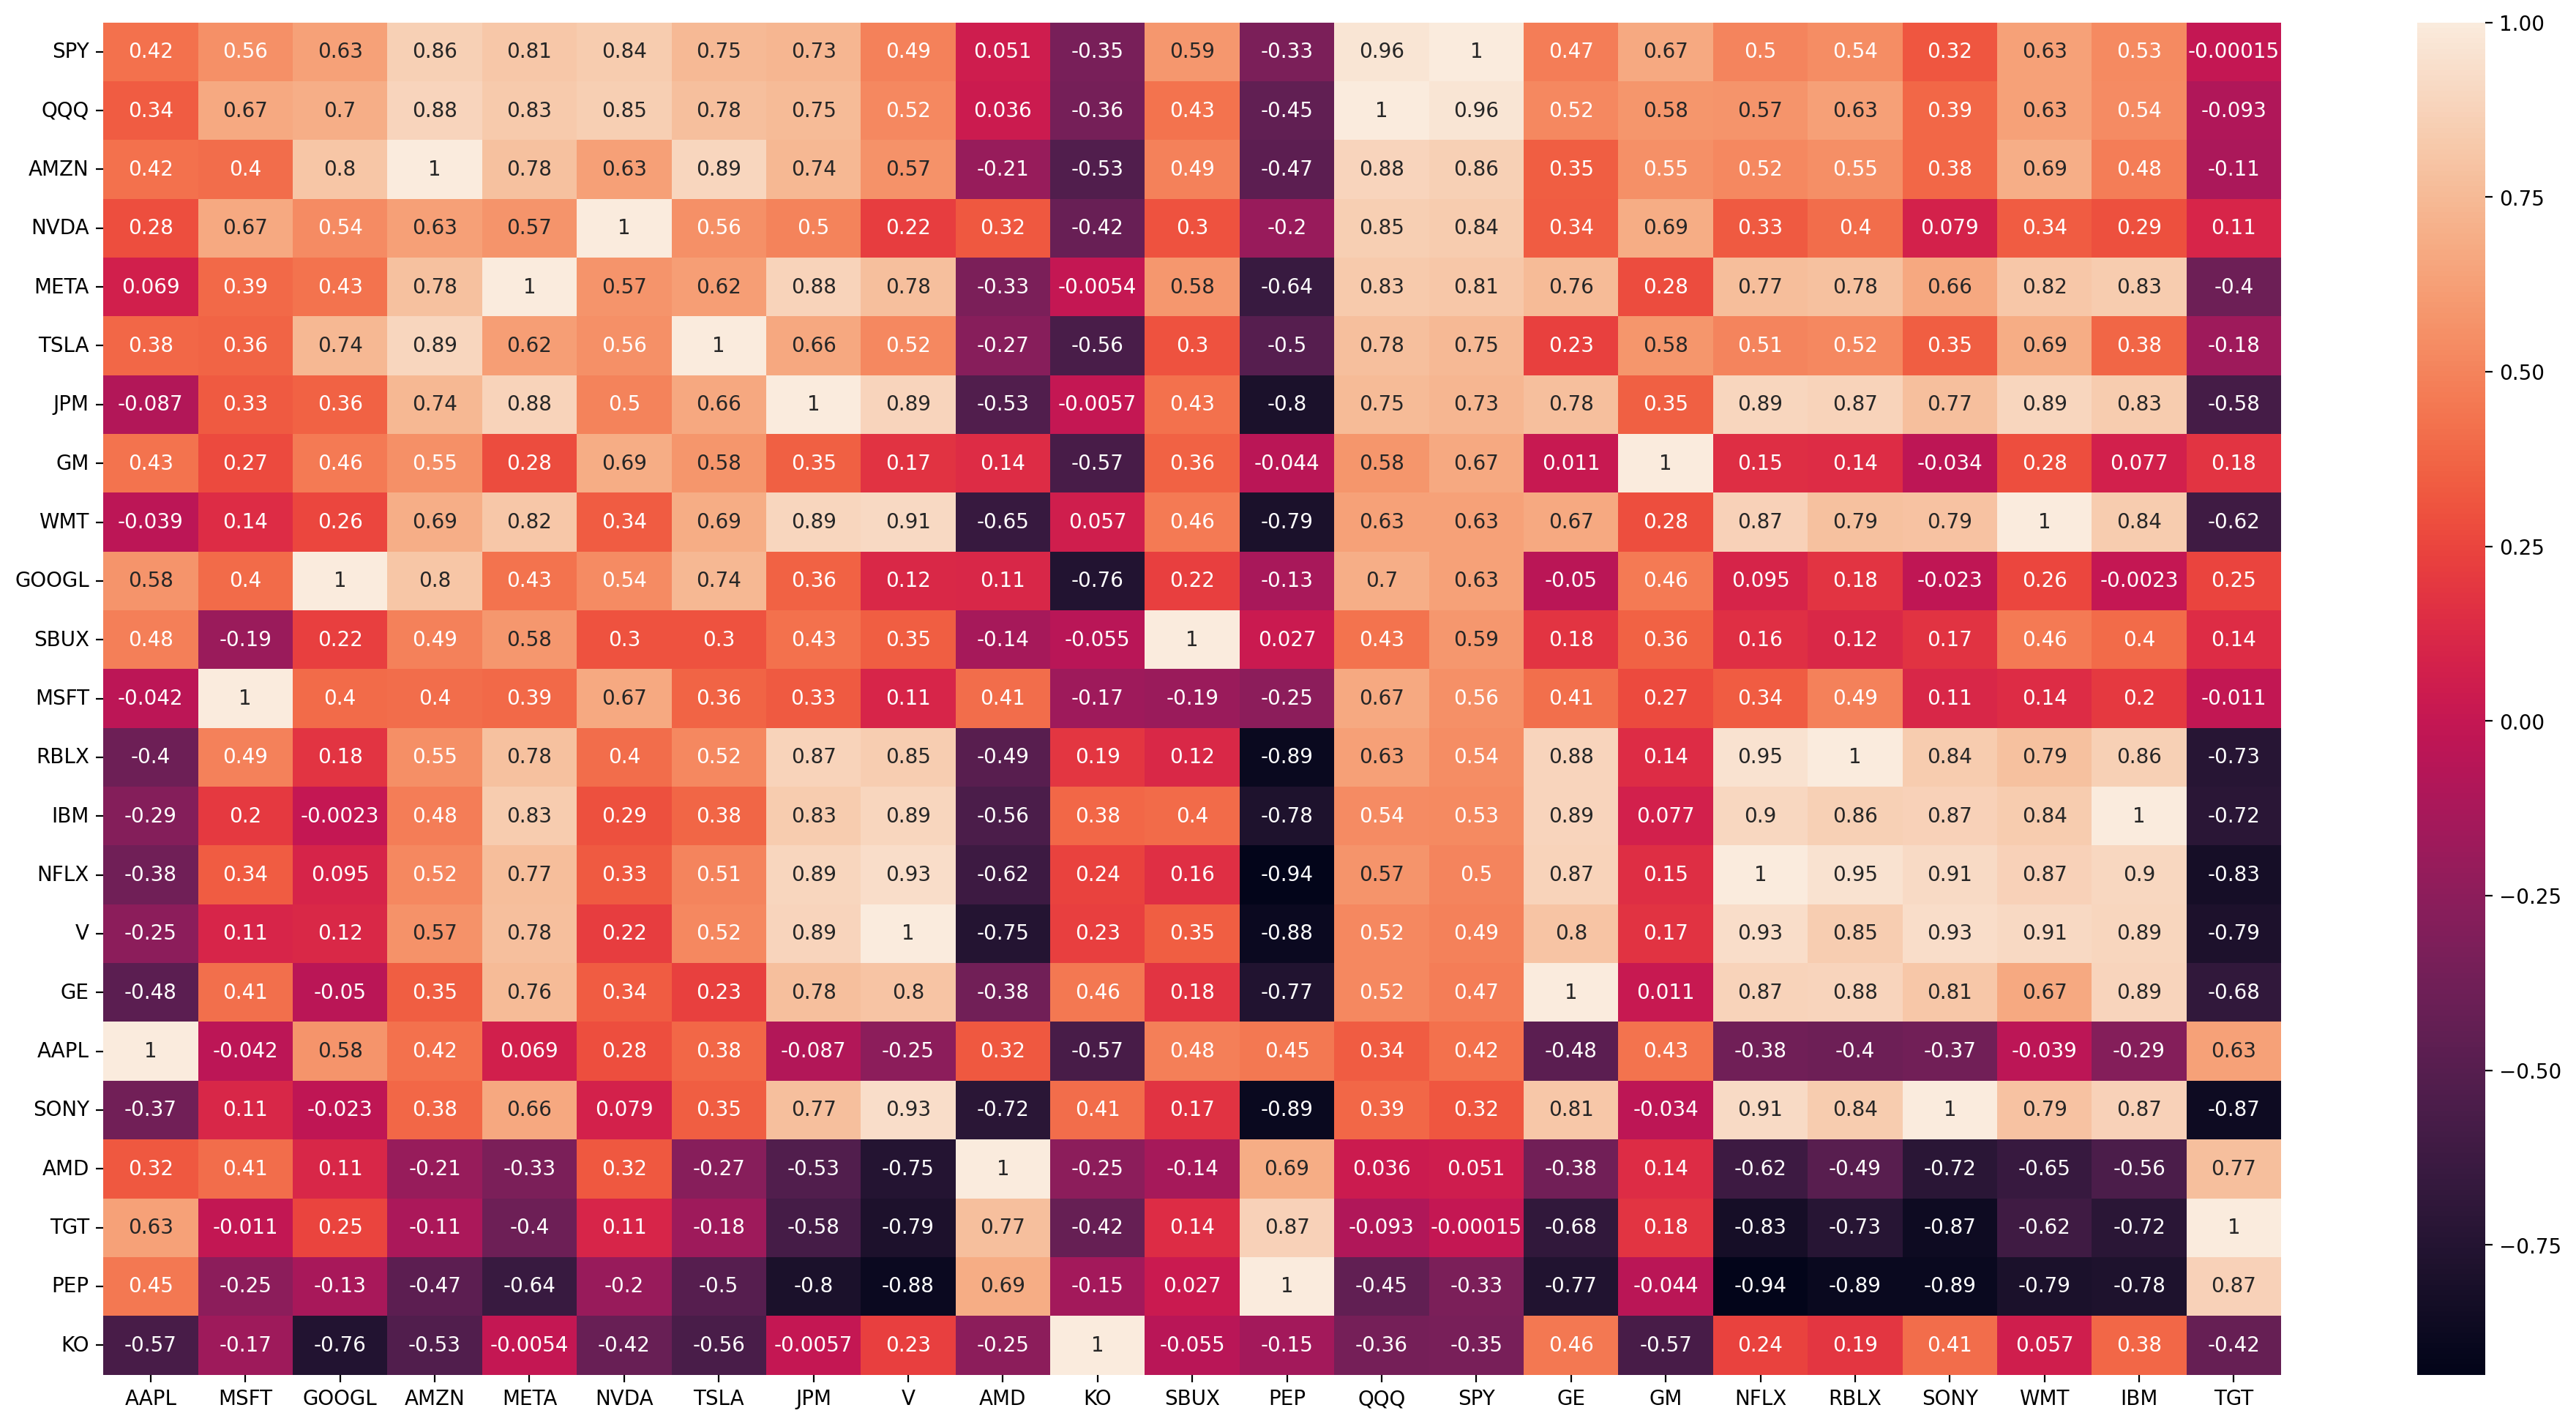

In [78]:
ascending = top_corr = correlation_across.sort_values(by = "SPY", ascending=False)

figure(figsize = (24,12), dpi = 200)

sns.heatmap(ascending, annot = True)

# ascending

<Axes: >

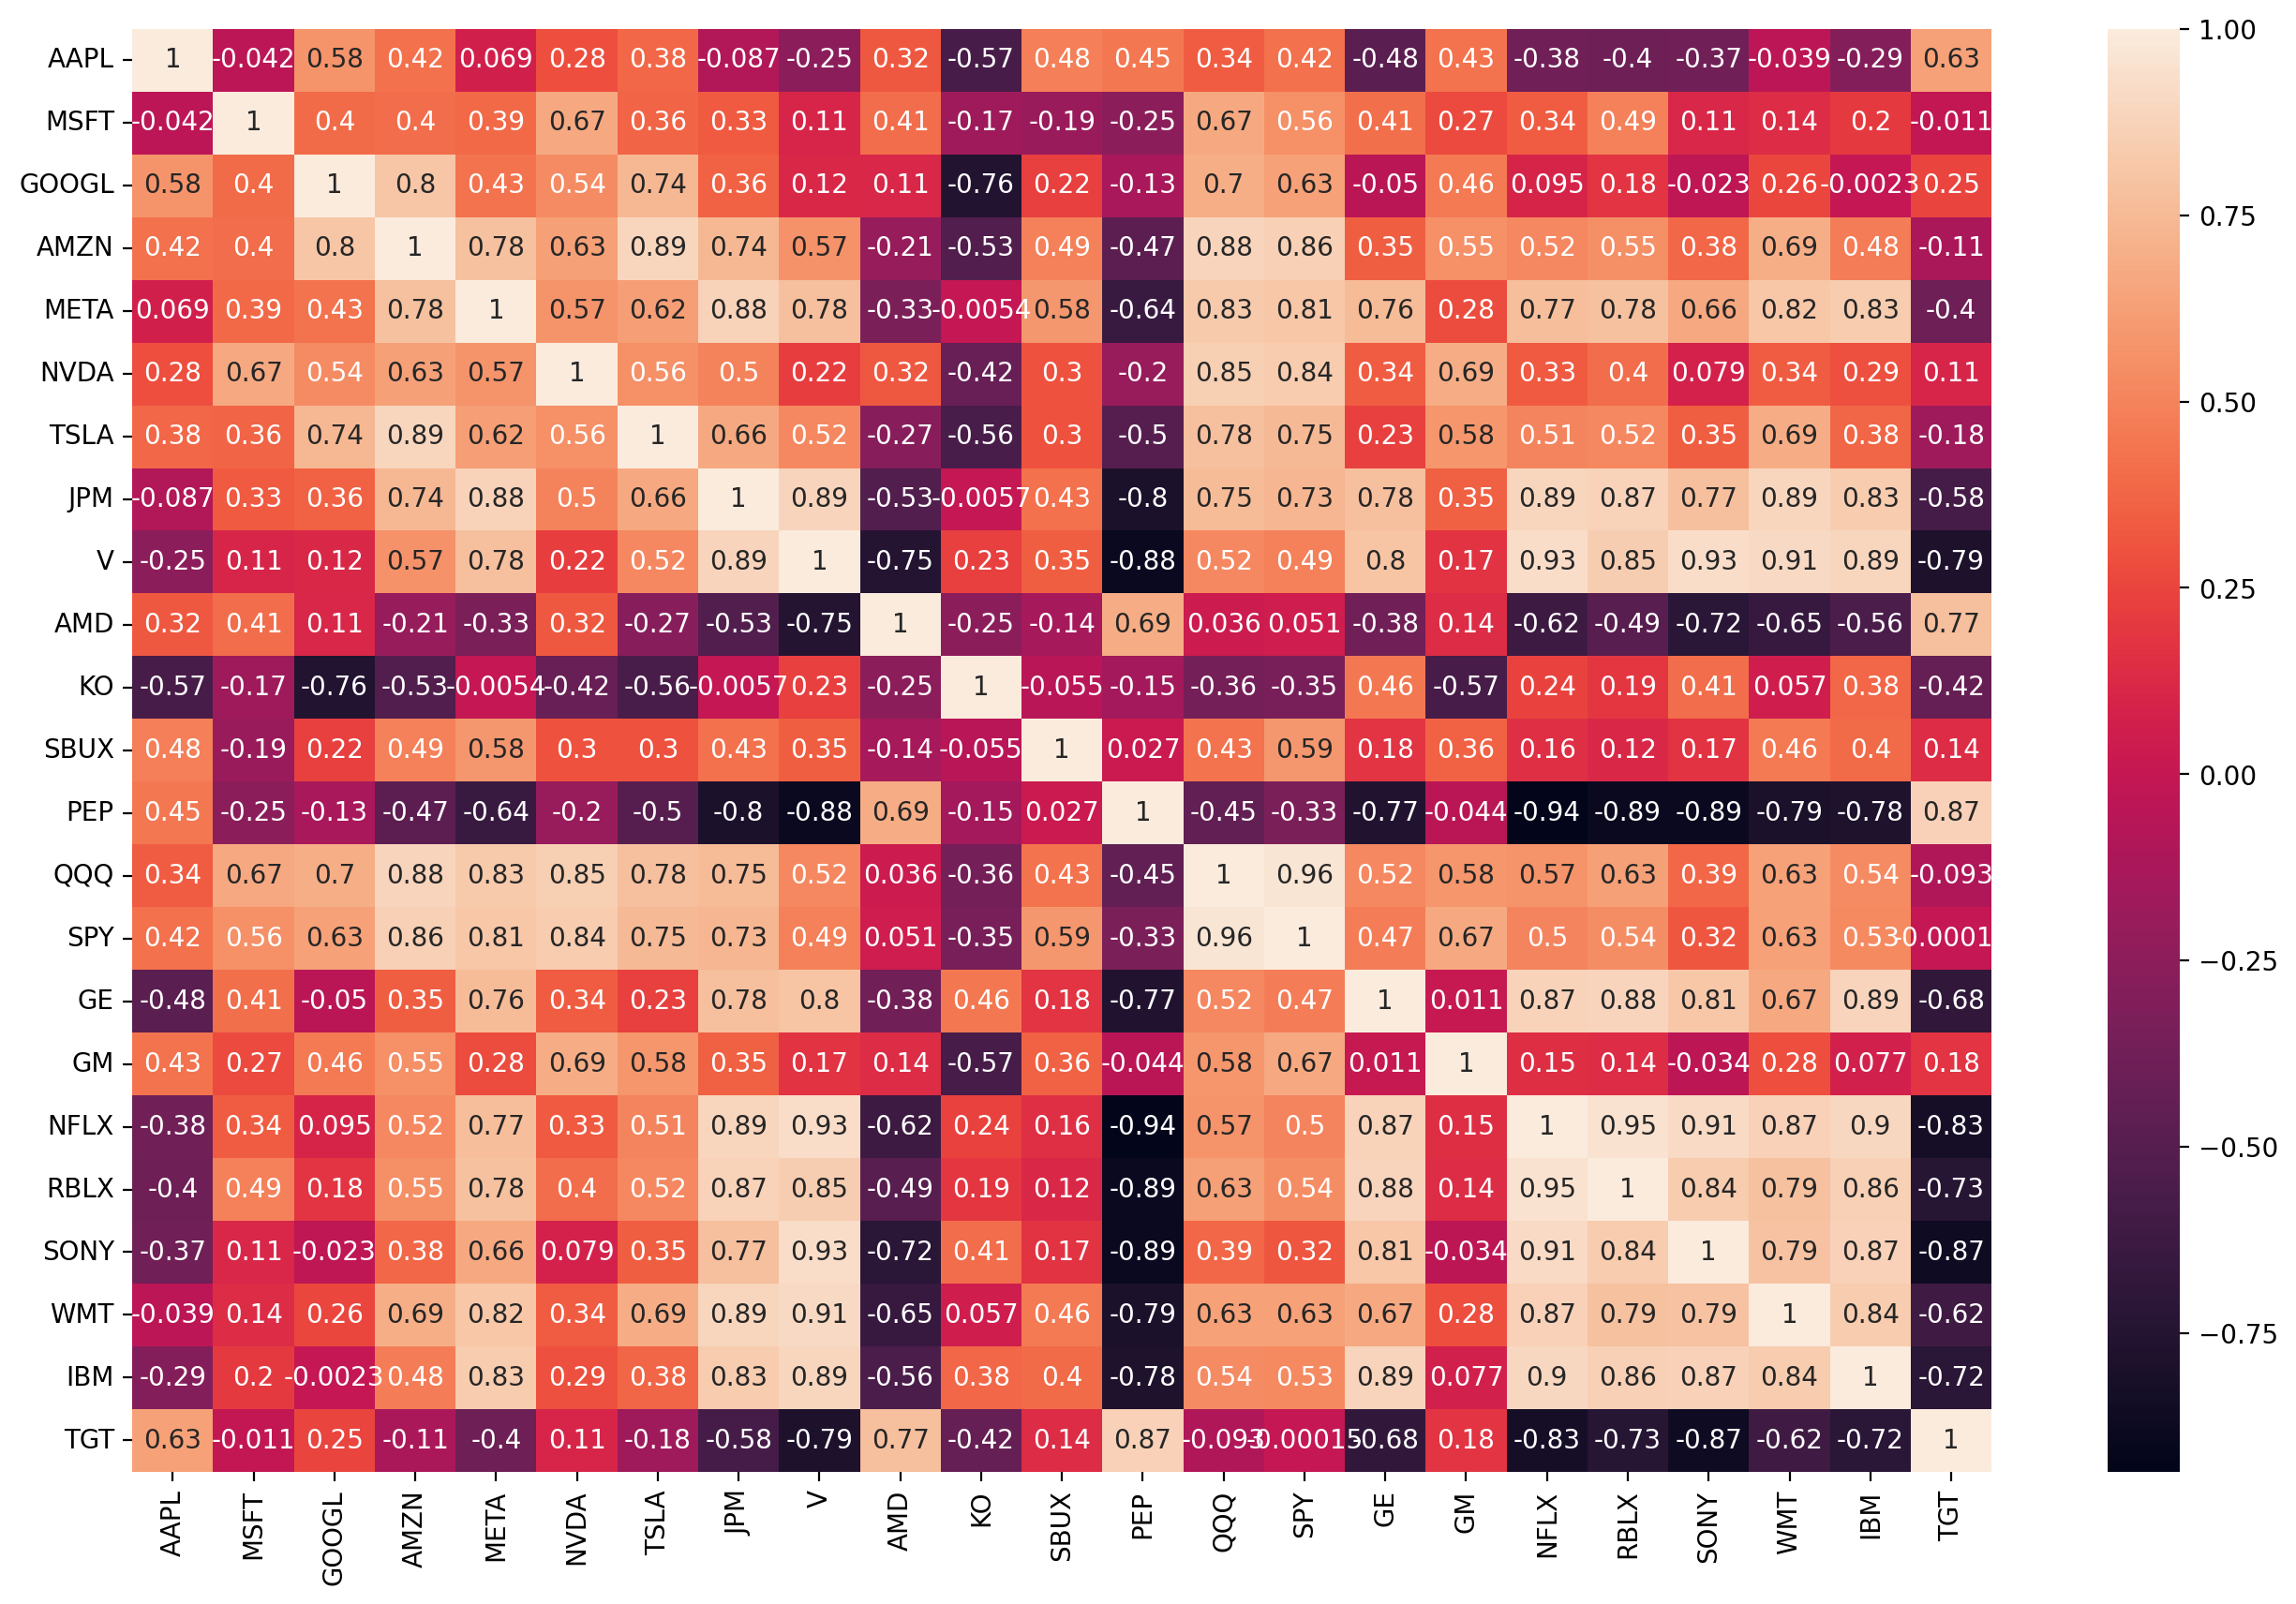

In [30]:
figure(figsize=(16, 10), dpi=200)
sns.heatmap(correlation_across, annot = True)

In [13]:
import statsmodels.tsa.stattools as ts 
result = ts.coint(closing_v, closing_jpm)

result

(-2.012762706838024,
 0.5219377124724076,
 array([-3.94078403, -3.36067957, -3.06145832]))

In [14]:
# Cointegration test: A technique used to find a potential correlation in a time series (long term)
# Determines if the spread between the two assets are constant over time.
# Null Hypothesis: Spread between series are non-stationary.
# Uses the augmented Engle-Granger two-step cointegration test.
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

if p_val < float(0.05):
    print(f'Passed')
else:
    print(f'Did not pass')

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.5219377124724076
Did not pass


In [335]:
from statsmodels.tsa.stattools import adfuller
# With all time series, you want to have stationary data otherwise our data will be very hard to predict.
visa_ADF = adfuller(closing_v)
print('P value for the Augmented Dickey-Fuller Test is', visa_ADF[1])
jpm_ADF = adfuller(closing_jpm)
print('P value for the Augmented Dickey-Fuller Test is', jpm_ADF[1])
Spread_ADF = adfuller(closing_v - closing_jpm)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Ratio_ADF = adfuller(closing_v / closing_jpm)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])
# Spread looks fine. If you'd want even better results, consider taking the difference (order 1) of Berkshire and MSFT

# Results: can only claim stationary for the spread (since P value < 0.05). This suggests a constant mean over time.
# Therefore, the two series are cointegrated.


P value for the Augmented Dickey-Fuller Test is 0.6517634737310476
P value for the Augmented Dickey-Fuller Test is 0.7920267125666891
P value for the Augmented Dickey-Fuller Test is 0.3028494933372312
P value for the Augmented Dickey-Fuller Test is 0.18141923453150116


Text(0.5, 1.0, 'Price Ratio between visa and jpm')

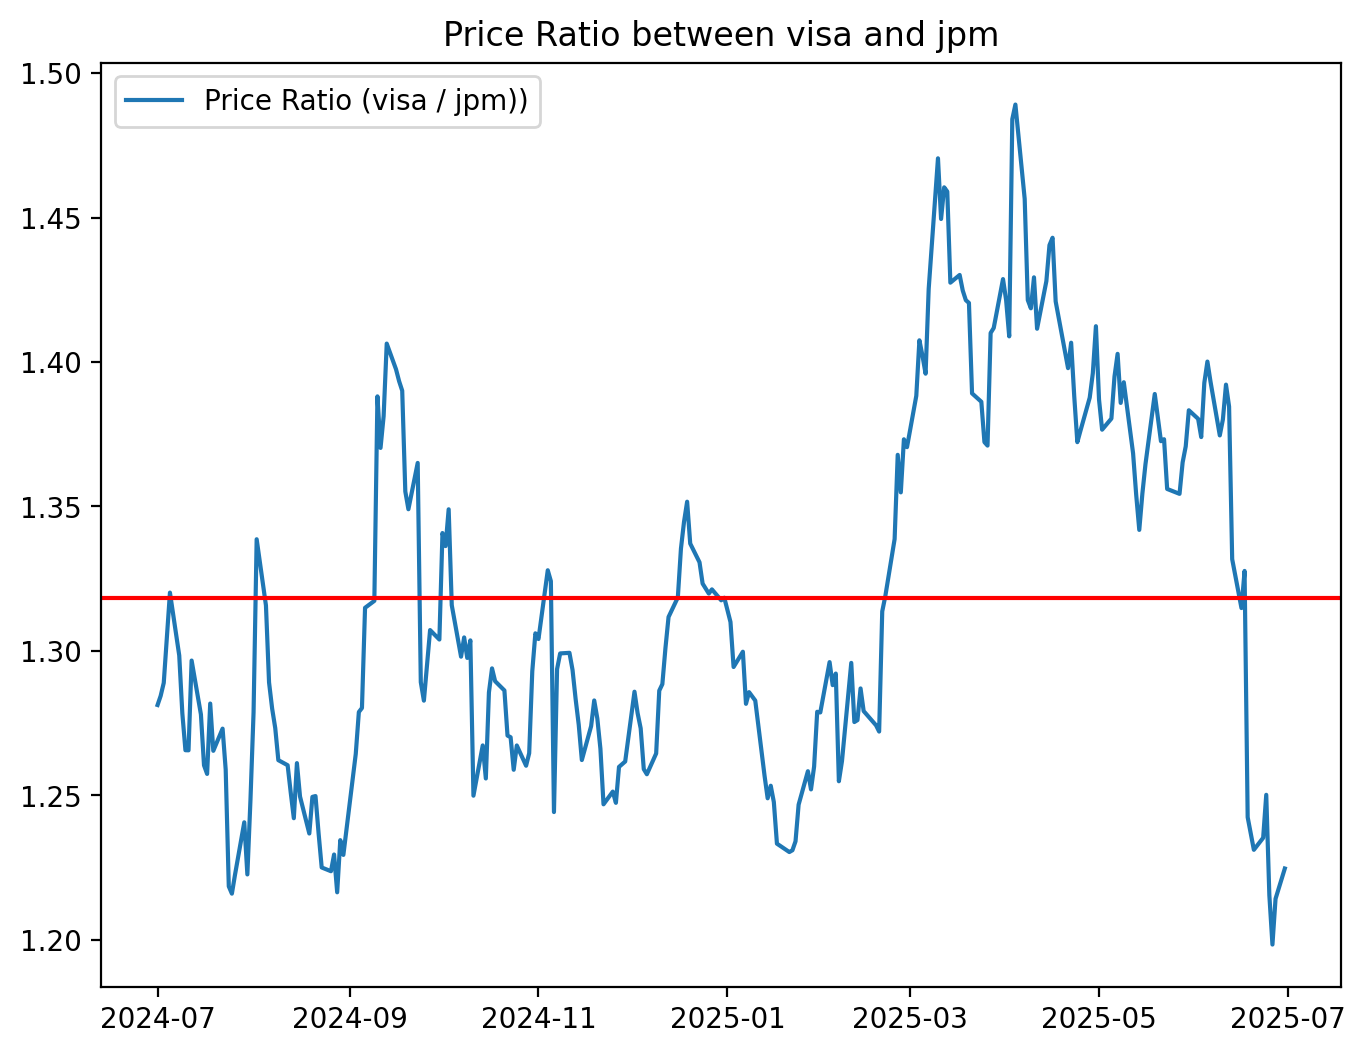

In [321]:
# Also, we can take a look at the price ratios between the two time series.
figure(figsize=(8, 6), dpi=200)
ratio = closing_v / closing_jpm
plt.plot(ratio, label = 'Price Ratio (visa / jpm))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between visa and jpm")

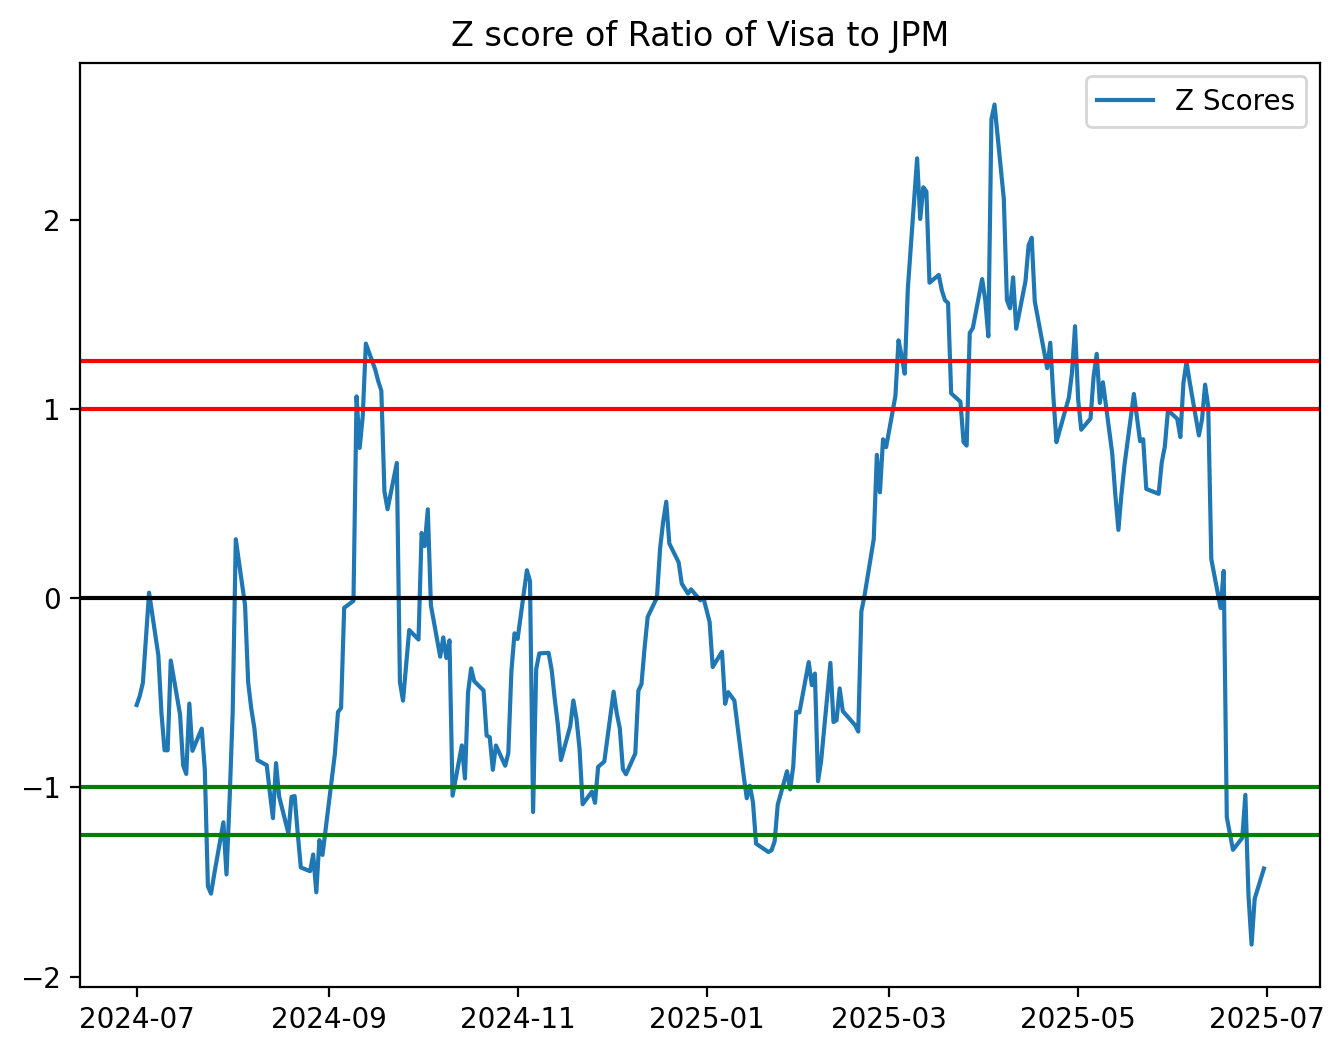

In [333]:

figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of Visa to JPM')
plt.show()


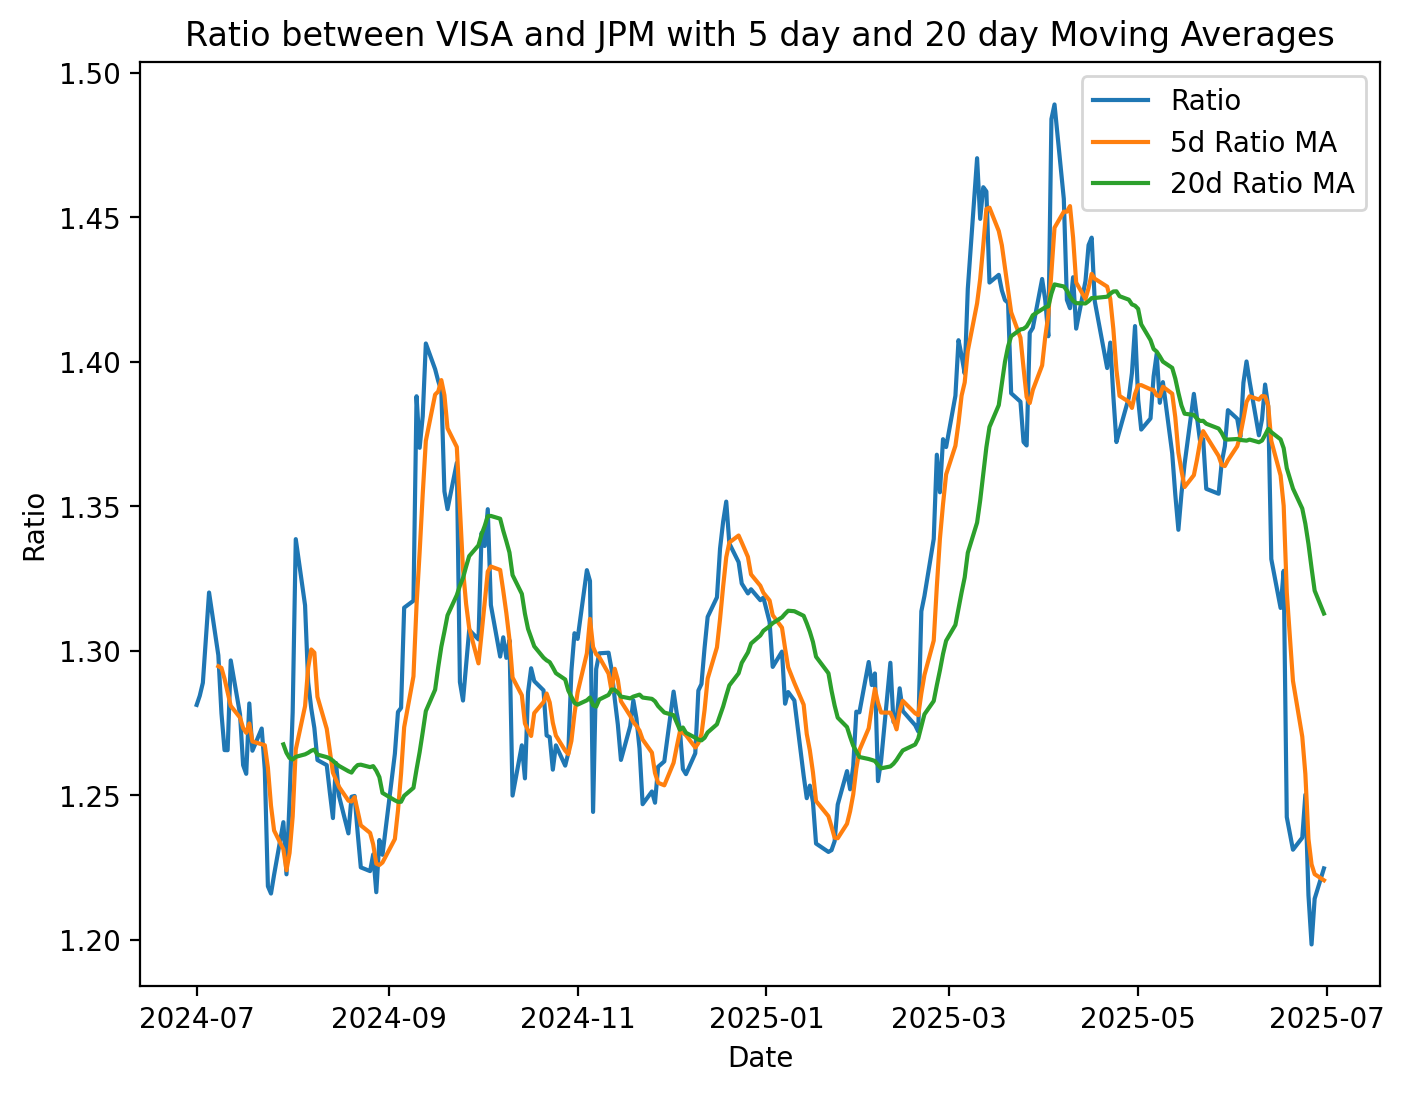

In [327]:
figure(figsize=(8, 6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio between VISA and JPM with 5 day and 20 day Moving Averages')
plt.show()

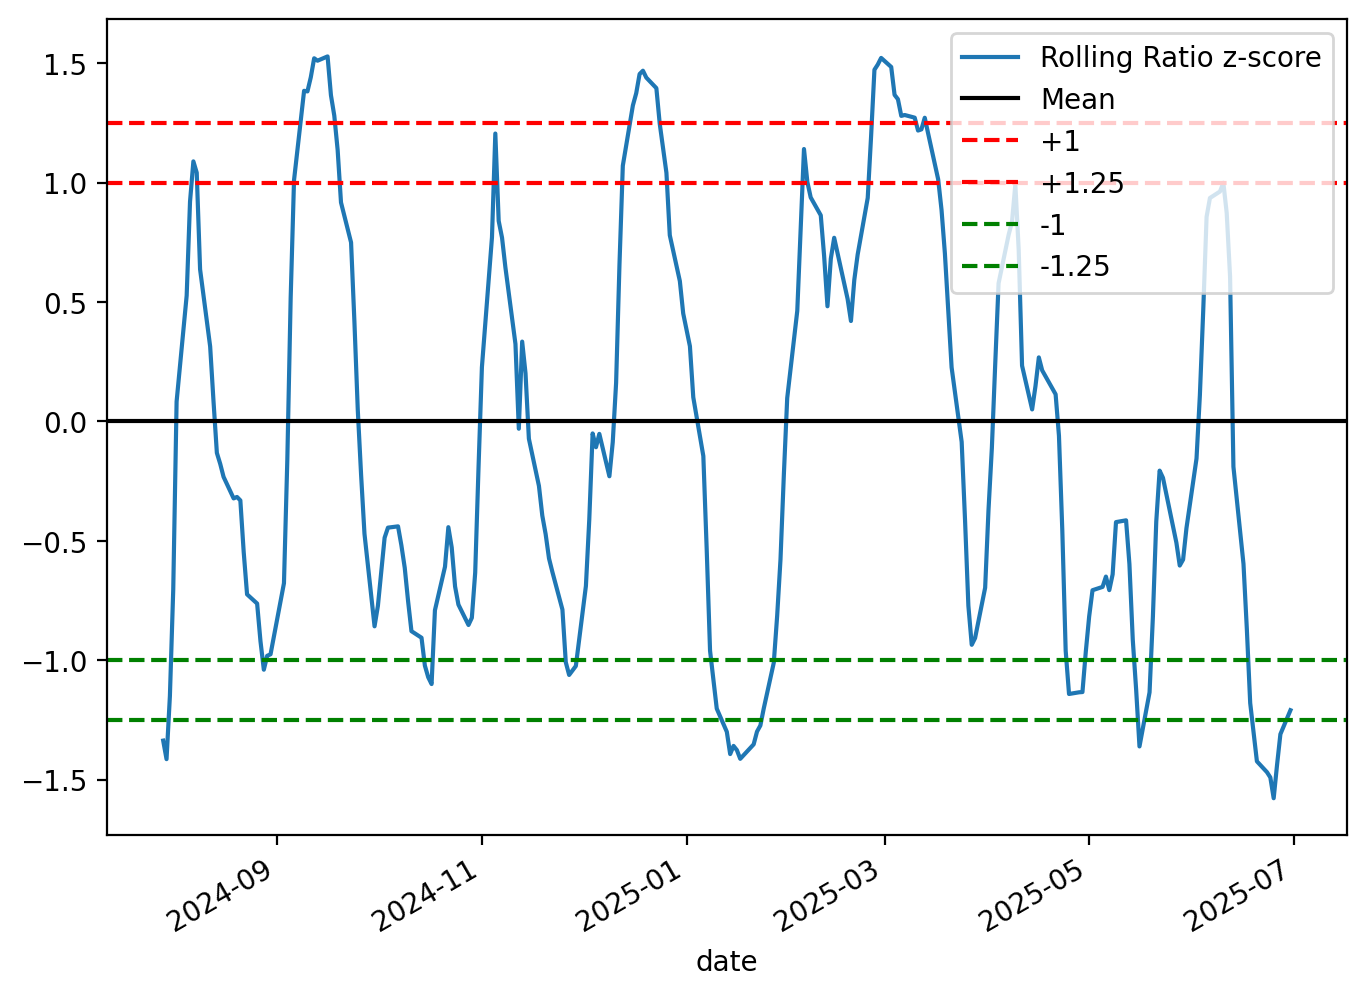

In [329]:
figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

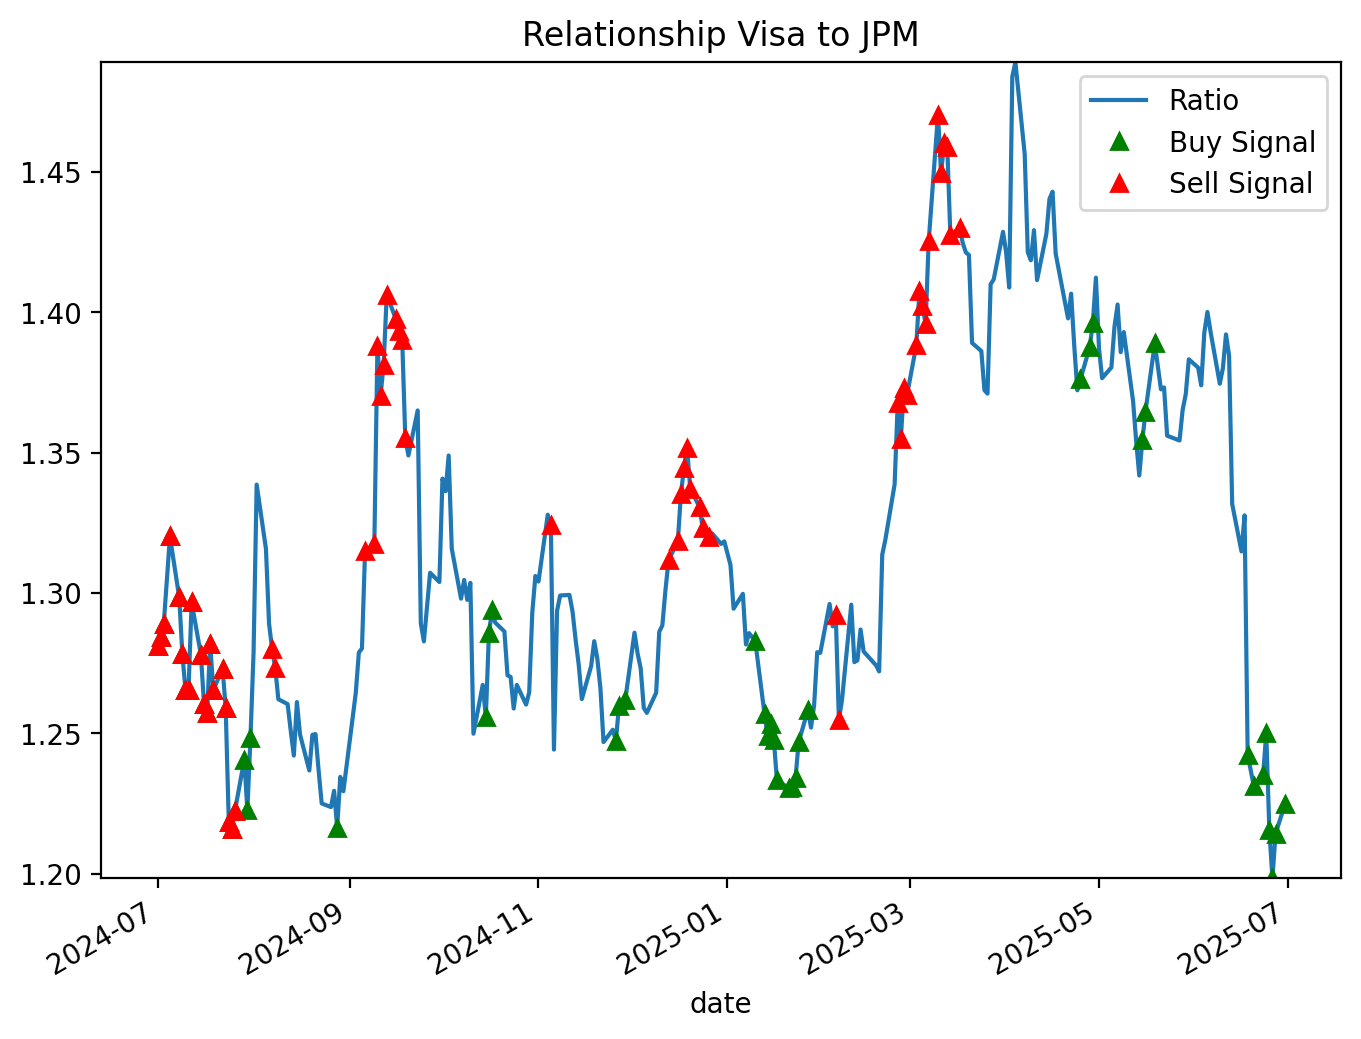

In [331]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship Visa to JPM')
plt.show()

In [238]:
# this is typically the functions we use for importing fundamental data
obb.equity.fundamental.metrics(
    "AAPL",
    provider = "yfinance")

symbol    market_cap   pe_ratio  forward_pe  peg_ratio_ttm  \
0   AAPL  2.990371e+12  31.234789    24.09326         1.8326   

   enterprise_to_ebitda  earnings_growth  earnings_growth_quarterly  \
0                21.985            0.078                      0.048   

   revenue_per_share  revenue_growth  ...  price_to_book  enterprise_value  \
0             26.455           0.051  ...      44.780807     3052983812096   

   overall_risk  audit_risk  board_risk  compensation_risk  \
0           1.0         7.0         1.0                3.0   

   shareholder_rights_risk   beta  price_return_1y  currency  
0                      1.0  1.211        -0.072295       USD  

[1 rows x 34 columns]

In [239]:
options = obb.derivatives.options.chains('AAPL', provider="yfinance")
options.head()

underlying_symbol  underlying_price      contract_symbol  expiration  dte  \
0              AAPL            200.19  AAPL250703C00110000  2025-07-03    3   
1              AAPL            200.19  AAPL250703P00110000  2025-07-03    3   
2              AAPL            200.19  AAPL250703P00120000  2025-07-03    3   
3              AAPL            200.19  AAPL250703P00125000  2025-07-03    3   
4              AAPL            200.19  AAPL250703P00130000  2025-07-03    3   

   strike option_type  open_interest  volume  last_trade_price  \
0   110.0        call            438      15             90.10   
1   110.0         put             98       2              0.01   
2   120.0         put             10       1              0.01   
3   125.0         put             10       5              0.01   
4   130.0         put              7       2              0.02   

             last_trade_time    bid    ask    change  change_percent  \
0  2025-06-30 11:58:03-04:00  89.85  90.75 -1.389999       -0.015193   
1  2025-06-23 14:09:18-04:00   0.00   0.01  0.000000        0.000000   
2  2025-06-26 11:30:12-04:00   0.00   0.01  0.000000        0.000000   
3  2025-06-23 15:31:09-04:00   0.00   0.01  0.000000        0.000000   
4  2025-06-30 09:30:00-04:00   0.00   0.01  0.010000        1.000000   

   implied_volatility  in_the_money currency  
0            2.410160          True      USD  
1            1.781251         False      USD  
2            1.531252         False      USD  
3            1.437503         False      USD  
4            1.312503         False      USD